# Investigate with Jupyter(Python) dataset - Titanic Project
Titanic dataframe - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. Main scope of the anaylis is to discover the factors which made people more likely to survive.

- dataset: titanic_df.csv (Source: https://www.kaggle.com/c/titanic/df)
- Analysis: developed by Daniele Salvigni (***daniele.salvigni@airbus.com***)
- platform: Python 3.x/Jupyter/Anaconda 3.x distr.

**The CSV(titanic_data.csv)file presents the following headers:**
- PassengerId -> Unique ID of the passenger
- Survived -> If the passenger is survived (0 = No; 1 = Yes)
- Pclass -> Class of the Passenger (1 = 1st // 2 = 2nd // 3 = 3rd)
- Name -> Name of the passenger
- Sex -> Sex of the passenger
- Age -> Age of the passenger
- sibsp -> # of siblings / spouses aboard the Titanic	
- parch -> # of parents / children aboard the Titanic	
- ticket -> Ticket number	
- fare -> Passenger fare	
- cabin -> Cabin number	
- embarked -> Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


# Variable Notes
**pclass:**
A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** 
Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** 
The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** 
The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Questions linked to the nature of the dataset:
- **a) Does the survival rate depend on the social status (SES)?**
- **b) Did a specific category(Men/Women/Children) have more chances to survive?**
- **c) Did married have women better survival rate Vs not married women? Was the Sex type relevant?** 
- **e) Was the age relavant to increase their chances of survival?**

***Assumptions***
Everybody who was able to reach a lifeboat had the chance to survive.

In [11]:
#Upload dfset and start Analysis of the df

#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

#Suppress all warning which are very annoying ...\_(シ)_/...
warnings.filterwarnings('ignore')

#Magic render
%matplotlib inline

# Create pandas dataframe
df = pd.read_csv('titanic_data.csv')

# Print first sample rows from csv
print('Header sample extraction from the dataset:')
df.head()



Header sample extraction from the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Comment:***

- Some df are "NaN". 
- Some df are not required for my analysis. I will need the following subset:
    - Survived
    - Pclass
    - Sex
    - Age
    - SibSp
    - parch
- Some df needs to be casted (Nice to have the TypeOf set up in the right way for all the dftype involved: INT,STR etc...)
- Some lines can be duplicated

In [2]:
#Print number of line
total_rows = len(df.index)+1
print('- Number of total rows:'+str(total_rows))

#I remove duplicates
nd_df = df.duplicated() #nd stands for not duplicates

#I check if have been removed duplicates
if nd_df.sum() == 0:
    print('- No Duplicates found!')

#Check if it counts correct the duplicates for othercolumns
test_duplicate = df.head().duplicated('Sex') 

if test_duplicate.sum() == 0:
    print('- No Duplicates found!')
    print('')
else:
    print('- I found the following duplicates in the "df.head" print out, for Sex column: '+str(test_duplicate.sum()))
    print('')


- Number of total rows:892
- No Duplicates found!
- I found the following duplicates in the "df.head" print out, for Sex column: 3



In [12]:
#Create the new dataset as a subset of the columns I need
clean_df =df.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'], axis=1)

#I check the result. 'clean_df' will be the main dataframe used within the entire project
print('Header sample extraction from the clean dataset (Drop of PassengerId,Name,Ticket,Cabin,Fare,Embarked columns): ')
clean_df.head()

Header sample extraction from the clean dataset (Drop of PassengerId,Name,Ticket,Cabin,Fare,Embarked columns): 


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [14]:
#I check if I have NaN values
print('Number of missing Age (NaN values) over all the dataset:')
clean_df.isnull().sum()


Number of missing Age (NaN values) over all the dataset:


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [15]:
#Unfortunately we are missing AGE data, which could influence our analysis. 
#In %, this means that we miss:
line_missing_percent = round((177*100/(total_rows)))

# Review some of the missing Age data
#Number of NaN values
age_null = pd.isnull(clean_df['Age'])
#Number of Females without age on board
how_many_female_no_age = clean_df[age_null]['Sex'] == 'female'
#Number of Males without age on board
how_many_male_no_age = clean_df[age_null]['Sex'] == 'male'

print('- Total number of female without age: '+str(how_many_female_no_age.sum()))
print('- Total number of male without age: '+str(how_many_male_no_age.sum()))
print('- Number of total rows: '+str(total_rows))
print('% of Lines which are missing an Age: '+str(line_missing_percent)+'%')
print('')
print('Sample of lines extracted to show the NaN age values:')
clean_df[age_null].head()



- Total number of female without age: 53
- Total number of male without age: 124
- Number of total rows: 892
% of Lines which are missing an Age: 20%

Sample of lines extracted to show the NaN age values:


,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


***Comment:***
The 20% of missing ages will impact the calculation of the AVG related the Age of the people in Board and it can make unreliable the consideration based on the Age distribution. By the way we will try to apply an analysis about the Age as the last point (Question D.)

In [17]:
#No that we have cleaned the data set we start to have a look to the descriptive statistics parameter automatically
#Caculated by the .describe method
print('Statistic Descriptive table of our dataset:')
clean_df.describe()

Statistic Descriptive table of our dataset:


,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [19]:
#By a first sight we can notice that the range of Age is quite wide:
print('Extreme values of our dataset:')
print('- Oldest survived age: '+str(clean_df[clean_df['Survived']==1]['Age'].max()))
print('- Youngest survived age: '+str(clean_df[clean_df['Survived']==1]['Age'].min()))
print('- Oldest died age: '+str(clean_df[clean_df['Survived']==0]['Age'].max()))
print('- Younget died age: '+str(clean_df[clean_df['Survived']==0]['Age'].min()))
print('- Number of survived under 4 years old: '+str(clean_df.loc[(clean_df['Age'] < 4) & clean_df['Survived'] == 1]['Age'].count()))

Extreme values of our dataset:
- Oldest survived age: 80.0
- Youngest survived age: 0.42
- Oldest died age: 74.0
- Younget died age: 1.0
- Number of survived under 4 years old: 20


***Comment:***
As visible we have some extrame case of survived people under the 4 years old: if we had a complete vision of the Ages (we know we missed around 177 ages values) I would have analyzed the possibility to see if it could be a link between survivors and age over 4 years threashold based on the following study:

- http://www.bluewaveswim.co.uk/blog/popular/whats-the-best-age-for-a-child-to-begin-swimming-lessons

The oldest survived is 80 years old and the yungest under 1 years old. 
At the same time the oldest died is 74 years old an the yungest is 1 years old.

## We start the resolution of our questions

## Question A:
## Does the survival rate depend on the social status (SES)?

-----------------------------------
----------Summary results----------
-----------------------------------
Class 1 - Male. % of survivors:36.9
Class 1 - Female. % of survivors:96.8
Class 1 - Male. % of dead:63.1
Class 1 - Female. % of dead:3.2
-----------------------------------
Class 2 - Male. % of survivors:15.7
Class 2 - Female. % of survivors:92.1
Class 2 - Male. % of dead:84.3
Class 2 - Female. % of dead:7.9
-----------------------------------
Class 3 - Male. % of survivors:13.5
Class 3 - Female. % of survivors:50.0
Class 3 - Male. % of dead:86.5
Class 3 - Female. % of dead:50.0
-----------------------------------
Overall CLASS 1 % Survivors Vs Not Survived: 63.0% Vs 37.0%
Overall CLASS 2 % Survivors Vs Not Survived: 47.3% Vs 52.7%
Overall CLASS 3 % Survivors Vs Not Survived: 24.2% Vs 75.8%
-----------------------------------------------------------
Legenda: 1-> Upper class, 2-> Middle class, 3-> Lower class
-----------------------------------------------------------


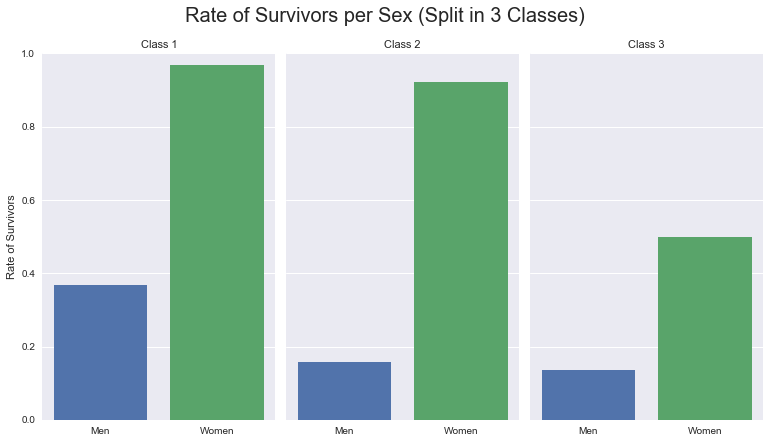

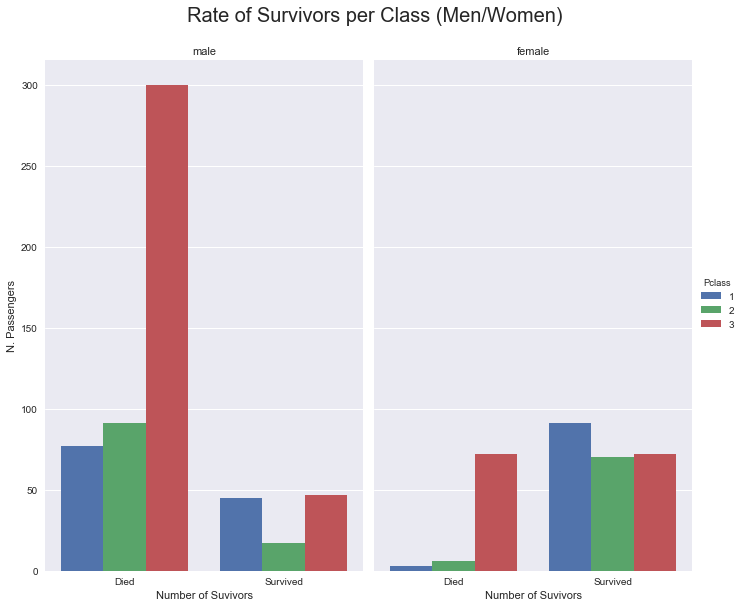

In [28]:
#we proceed to calculate the rate of survivals grouped by sex and class status. In order to do this we
#create a function which can return us the numer per class and sex in %. 
#After this we proceed to print out the results and the graphs
#Test code to see the results of grouping method:
#clean_df.groupby(['Pclass','Survived','Sex']).size()[1,1,'female'].astype('double') -> return number of alive,1st class female in double format
#clean_df.groupby(['Pclass','Survived','Sex']).size()[1,1,'male'].astype('double') -> return number of alive,1st class male in double format

def percent_of_survivors(Pclass,Sex):
    #we calculate the total people of the given sex and class
    total = clean_df.groupby(['Pclass','Sex']).size()[Pclass,Sex].astype('double')
    #we calculate the survived
    survived = clean_df.groupby(['Pclass','Survived','Sex']).size()[Pclass,1,Sex].astype('double')
    percent_of_survivors = (survived/total*100).round(1)
    return percent_of_survivors
    
def percent_of_dead(Pclass,Sex):
    #we calculate the total people of the given sex and class
    total = clean_df.groupby(['Pclass','Sex']).size()[Pclass,Sex].astype('double')
    #we the people who died
    dead = clean_df.groupby(['Pclass','Survived','Sex']).size()[Pclass,0,Sex].astype('double')
    percent_of_dead = (dead/total*100).round(1)
    return percent_of_dead

#I create a dedicate couple of functions to calculate survivors vs died people overall
def percent_of_survivors_overall(Pclass):
    #we calculate the total people of the given sex and class
    total = clean_df.groupby(['Pclass']).size()[Pclass].astype('double')
    #we calculate the survived
    survived = clean_df.groupby(['Pclass','Survived']).size()[Pclass,1].astype('double')
    percent_of_survivors_overall = (survived/total*100).round(1)
    return percent_of_survivors_overall

def percent_of_not_survivors_overall(Pclass):
    #we calculate the total people of the given sex and class
    total = clean_df.groupby(['Pclass']).size()[Pclass].astype('double')
    #we calculate the survived
    survived = clean_df.groupby(['Pclass','Survived']).size()[Pclass,0].astype('double')
    percent_of_not_survivors_overall = (survived/total*100).round(1)
    return percent_of_not_survivors_overall

print('-----------------------------------')
print('----------Summary results----------')
print('-----------------------------------')
print('Class 1 - Male. % of survivors:'+str(percent_of_survivors(1,'male')))
print('Class 1 - Female. % of survivors:'+str(percent_of_survivors(1,'female')))
print('Class 1 - Male. % of dead:'+str(percent_of_dead(1,'male')))
print('Class 1 - Female. % of dead:'+str(percent_of_dead(1,'female')))
print('-----------------------------------')
print('Class 2 - Male. % of survivors:'+str(percent_of_survivors(2,'male')))
print('Class 2 - Female. % of survivors:'+str(percent_of_survivors(2,'female')))
print('Class 2 - Male. % of dead:'+str(percent_of_dead(2,'male')))
print('Class 2 - Female. % of dead:'+str(percent_of_dead(2,'female')))
print('-----------------------------------')
print('Class 3 - Male. % of survivors:'+str(percent_of_survivors(3,'male')))
print('Class 3 - Female. % of survivors:'+str(percent_of_survivors(3,'female')))
print('Class 3 - Male. % of dead:'+str(percent_of_dead(3,'male')))
print('Class 3 - Female. % of dead:'+str(percent_of_dead(3,'female')))
print('-----------------------------------')


#Graph01: we Grouped by sex, survival status and class
gr01 = sns.factorplot(x="Sex", y="Survived", col="Pclass",data=clean_df,kind="bar",ci=None,aspect=.6,size=6,saturation=.9)

#title of the graph
gr01.fig.suptitle('Rate of Survivors per Sex (Split in 3 Classes)', fontsize=20,y=1.05)

#Graph01: label of the axes
(gr01.set_axis_labels('', 'Rate of Survivors')
     .set_xticklabels(["Men", "Women"])
     .set(ylim=(0, 1))
     .set_titles("Class {col_name}")
     .despine(left=True, bottom=True))

#Graph02: we count the passengers which survived, by class and sex
gr02 = sns.factorplot('Survived', col='Sex', hue='Pclass', data=clean_df, kind='count',aspect=.6,size=8,saturation=.9)

#title of the graph
gr02.fig.suptitle('Rate of Survivors per Class (Men/Women)', fontsize=20,y=1.05)

# Fix up the labels
(gr02.set_axis_labels('Number of Suvivors', 'N. Passengers')
    .set_xticklabels(["Died", "Survived"])
    .set_titles('{col_name}')
)



print('Overall CLASS 1 % Survivors Vs Not Survived: '+str(percent_of_survivors_overall(1))+'% Vs '+str(percent_of_not_survivors_overall(1))+'%')
print('Overall CLASS 2 % Survivors Vs Not Survived: '+str(percent_of_survivors_overall(2))+'% Vs '+str(percent_of_not_survivors_overall(2))+'%')
print('Overall CLASS 3 % Survivors Vs Not Survived: '+str(percent_of_survivors_overall(3))+'% Vs '+str(percent_of_not_survivors_overall(3))+'%')
print('-----------------------------------------------------------')
print('Legenda: 1-> Upper class, 2-> Middle class, 3-> Lower class')
print('-----------------------------------------------------------')



***Comment:***
Having a look to the results it appers that the rate of survivals among the 3 classes appear similar, by the way taking a look to the overall numbers:

- Overall CLASS 1 % Survivors Vs Not Survived: **63.0% Vs 37.0%**
- Overall CLASS 2 % Survivors Vs Not Survived: **47.3% Vs 52.7%**
- Overall CLASS 3 % Survivors Vs Not Survived: **24.2% Vs 75.8%**

we could presume that passenger from Class 1 had more chance to survive (>2 times) than passenger in class 3, so probably the **SES was a valid factor to discriminate between survived and not.**

## Question B:
## Did a specific category (Men/Women/Children)have more chances to survive?

I expect no lines with NULL Age value: 0
I expect only lines with NOT NULL Age value: 714


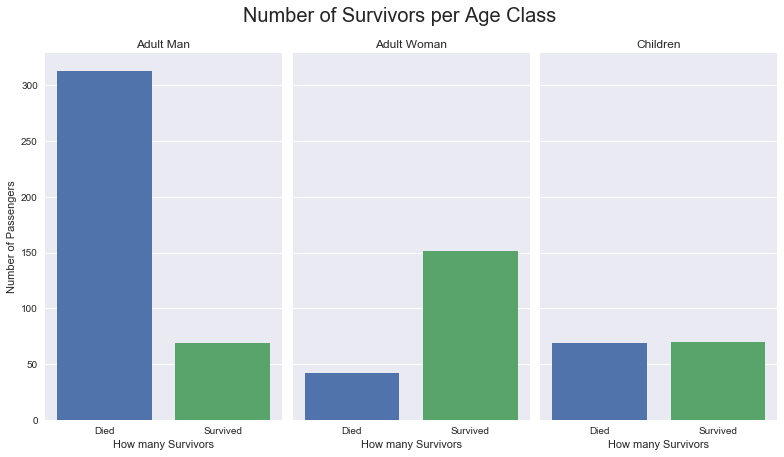

In [29]:
#In this case we have to label the category children considering that our dataset doesn´t cointain 
#any information about how to discriminate an Adult (men/women) vs a Child.

#Assumpiton
#Adult_Man: everybody with age > 18 years old, Man
#Adult_Woman: everybody with age > 18 years old, Female
#Children: everybod with age =<18 Female or Male

#I create a Purely label-location based indexer for selection by label. In this case oue labels will be like the 
#categories in the assumption


#we clean the dataframe from the Age NULL and we create a dataframe cointaining only line with age not null
#We check the null value on spot:
age_null = pd.isnull(clean_df['Age'])
clean_df[age_null].head()

#we create the new dataframe with no age null value
clean_age_df = clean_df[np.isfinite(clean_df['Age'])]
new_age_null= pd.isnull(clean_age_df['Age'])
print("I expect no lines with NULL Age value: "+str(clean_age_df[new_age_null]['Age'].count()))
print("I expect only lines with NOT NULL Age value: "+str(clean_age_df['Age'].count()))

#clean_df[clean_df['Survived']==1]['Age'].isnull()

#I create the label the different category
clean_age_df.loc[((clean_age_df['Sex'] == 'male')&(clean_age_df['Age'] > 18)),'Cat'] = 'Adul Man'
clean_age_df.loc[((clean_age_df['Sex'] == 'female')&(clean_age_df['Age'] > 18)),'Cat'] = 'Adult Woman'
clean_age_df.loc[((clean_age_df['Age'] <= 18)),'Cat'] = 'Children'
clean_age_df.loc[((clean_age_df['Survived'] == 0)),'Status'] = 'Not Survived'
clean_age_df.loc[((clean_age_df['Survived'] == 1)),'Status'] = 'Survived'

clean_age_df.groupby(['Cat','Status']).size()

#I create the Graph to compare how many Men, Women and Children are survived
gr03 = sns.factorplot('Survived', col='Cat', data=clean_age_df, kind='count', size=6, aspect=.6,saturation=.9)

#title of the graph
gr03.fig.suptitle('Number of Survivors per Age Class', fontsize=20,y=1.05)

#I set up the labels of the graph
(gr03.set_axis_labels('How many Survivors', 'Number of Passengers').set_xticklabels(['Died', 'Survived']))

titles = ['Adult Man', 'Adult Woman', 'Children']
for z1, title in zip(gr03.axes.flat, titles):
    z1.set_title(title)


***Comment:***
Looking at the graph we could say that the probably ***women and children had more chanche to survive than adult men*** by the way we have put the hypotesis that 18 is a reasonable age to consider somebody adult: The Adult age has shifted many times in the history of humanity (or simply think the "adults" who today can get merried in India or similar country where 11/12 years old are already "reasonable" thhreasholds to consider somebody adult or not).
Of course these kind of social "agreements" can influence a lot the result of our considerations.



## Question C:
## Did married women have better survival rate Vs not married women? Was the Sex type relevant?


------------Summary Table------------
Total number of Women found: 314
Number of Women grouped by Family Status  Status      
Married        Not Survived     44
               Survived         96
Not Married    Not Survived     37
               Survived        137
dtype: int64
-------------------------------------


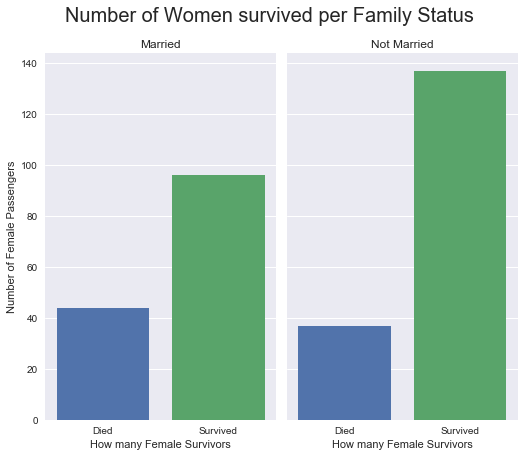

In [32]:
#I create a dataset with only women
clean_df_only_female=clean_df[clean_df['Sex']=='female']

#sibsp -> # of siblings / spouses aboard the Titanic. If 0->not married
clean_df_only_female.loc[(clean_df['SibSp'] == 0),'Family Status'] = 'Not Married'
clean_df_only_female.loc[(clean_df['SibSp'] != 0),'Family Status'] = 'Married'
clean_df_only_female.loc[((clean_df['Survived'] == 0)),'Status'] = 'Not Survived'
clean_df_only_female.loc[((clean_df['Survived'] == 1)),'Status'] = 'Survived'

print('------------Summary Table------------')
print('Total number of Women found: '+str(clean_df_only_female['Sex'].count()))
print('Number of Women grouped by '+str(clean_df_only_female.groupby(['Family Status','Status']).size()))
print('-------------------------------------')

#I create the Graph to compare how many Women merried Vs Not Married are survived
gr04 = sns.factorplot('Survived', col='Family Status', data=clean_df_only_female, kind='count', size=6, aspect=.6,saturation=.9)

#I set up the labels of the graph
(gr04.set_axis_labels('How many Female Survivors', 'Number of Female Passengers').set_xticklabels(['Died', 'Survived']))

#title of the graph
gr04.fig.suptitle('Number of Women survived per Family Status', fontsize=20,y=1.05)

titles = ['Married', 'Not Married']
for z2, title in zip(gr04.axes.flat, titles):
    z2.set_title(title)  

***Comment:***
As visible by the graph we could hipotetically think that ***Not Married Women had more chance to survive (graph shows ~30% almost more survived)***. In my mind this could be linked to the fact that married women can be slowered down in their process to escape because they wanted to fin the husband/Relatives or can be linked to the hunsand's decision where to go/how to escape. It is interesting to do the same analysis for the Men:

------------Summary Table------------
Total number of men found: 577
Number of men grouped by: Family Status  Status      
Married        Not Survived    107
               Survived         36
Not Married    Not Survived    361
               Survived         73
dtype: int64
-------------------------------------


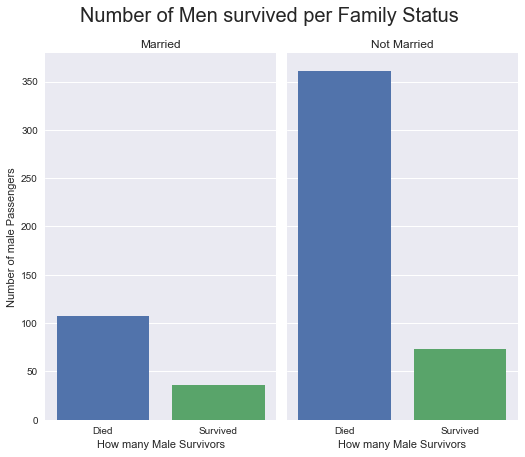

In [34]:
#I create a dataset with only men
clean_df_only_male=clean_df[clean_df['Sex']=='male']

#sibsp -> # of siblings / spouses aboard the Titanic. If 0->not married
clean_df_only_male.loc[(clean_df['SibSp'] == 0),'Family Status'] = 'Not Married'
clean_df_only_male.loc[(clean_df['SibSp'] != 0),'Family Status'] = 'Married'
clean_df_only_male.loc[((clean_df['Survived'] == 0)),'Status'] = 'Not Survived'
clean_df_only_male.loc[((clean_df['Survived'] == 1)),'Status'] = 'Survived'

print('------------Summary Table------------')
print('Total number of men found: '+str(clean_df_only_male['Sex'].count()))
print('Number of men grouped by: '+str(clean_df_only_male.groupby(['Family Status','Status']).size()))
print('-------------------------------------')


#I create the Graph to compare how many men merried Vs Not Married are survived
gr05 = sns.factorplot('Survived', col='Family Status', data=clean_df_only_male, kind='count', size=6, aspect=.6,saturation=.9)

#title of the graph
gr05.fig.suptitle('Number of Men survived per Family Status', fontsize=20,y=1.05)

#I set up the labels of the graph
(gr05.set_axis_labels('How many Male Survivors', 'Number of male Passengers').set_xticklabels(['Died', 'Survived']))

titles = ['Married', 'Not Married']
for z3, title in zip(gr05.axes.flat, titles):
    z3.set_title(title)  

***Comment:***
We notice practically and inverted situation: at that time Men were taking care of women so probably the majority of them preferrend to sacrifice himself to permit women to be safe.

Total number of Female: 314
Total number of Male: 577

------------Summary Table------------
Percentage of Male Not Survived: 81.1
Percentage of Male Survived: 18.9
Percentage of Female Not Survived: 25.8
Percentage of Female Survived: 74.2
-------------------------------------


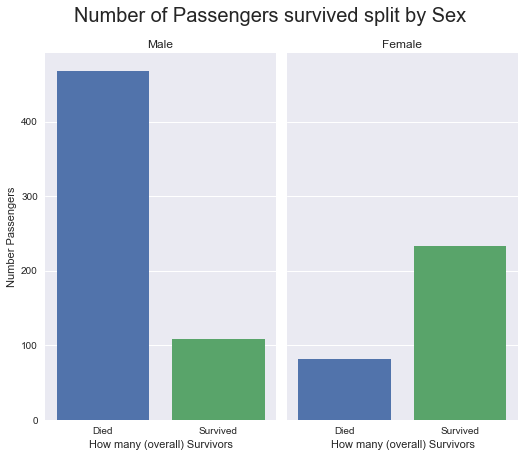

In [36]:
#We evaluate if the the Sex was relevant to be in the calss of survivors:
print('Total number of Female: '+str(clean_df_only_female['Sex'].count()))
print('Total number of Male: '+str(clean_df_only_male['Sex'].count()))
print('')
def percent_of_dead(Sex):
    #we calculate the total people of the given sex and class
    total = clean_df.groupby(['Sex']).size()[Sex].astype('double')
    #we calculate the people who died
    dead = clean_df.groupby(['Survived','Sex']).size()[0,Sex].astype('double')
    percent_of_dead = (dead/total*100).round(1)
    return percent_of_dead

def percent_of_survived(Sex):
    #we calculate the total people of the given sex and class
    total = clean_df.groupby(['Sex']).size()[Sex].astype('double')
    #we calculate the people who died
    alive = clean_df.groupby(['Survived','Sex']).size()[1,Sex].astype('double')
    percent_of_survived = (alive/total*100).round(1)
    return percent_of_survived

print('------------Summary Table------------')
print("Percentage of Male Not Survived: "+str(percent_of_dead('male')))
print("Percentage of Male Survived: "+str(percent_of_survived('male')))
print("Percentage of Female Not Survived: "+str(percent_of_dead('female')))
print("Percentage of Female Survived: "+str(percent_of_survived('female')))
print('-------------------------------------')


clean_df.loc[((clean_df['Survived'] == 0)),'Status_All'] = 'Not Survived'
clean_df.loc[((clean_df['Survived'] == 1)),'Status_All'] = 'Survived'

#I create the Graph to compare how many men merried Vs Not Married are survived
gr06 = sns.factorplot('Survived', col='Sex', data=clean_df, kind='count', size=6, aspect=.6,saturation=.9)

#title of the graph
gr06.fig.suptitle('Number of Passengers survived split by Sex', fontsize=20,y=1.05)

#I set up the labels of the graph
(gr06.set_axis_labels('How many (overall) Survivors', 'Number Passengers').set_xticklabels(['Died', 'Survived']))

titles = ['Male', 'Female']
for z4, title in zip(gr06.axes.flat, titles):
    z4.set_title(title) 



***Comment:***
In the end we can presume that ***being a Women*** and possibly ***being Not Married Women*** permitted to have more chance to survive!

## Question D:
## Was the age relavant to increase their chances of survival?

-------Summary Table--------
- Total number of female without age: 53
- Total number of male without age: 124
- Number of total rows: 892
- % of Lines which are missing an Age: 20%
- Total Survived: 290
- Total Died: 424
- AVG Survived: 1.0
- AVG Died: 0.0
----------------------------


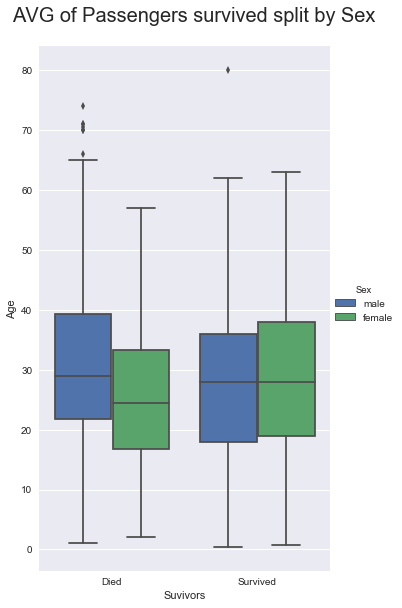

In [40]:
#As analized before we have some lines where the Age is missing. In this case we assume to remove 
#these lines and we consider them not "relevant"
#For the scope of the investigation. We ignore in this investigation the impact of Sex and Class analyzed before.

#Calculation in % of lines, in which we miss the Age:
line_missing_percent = round((177*100/(total_rows)))

# Review some of the missing Age data
#Number of NaN values
age_null = pd.isnull(clean_df['Age'])
#Number of female on board
how_many_female_no_age = clean_df[age_null]['Sex'] == 'female'
#Number of Male on board
how_many_male_no_age = clean_df[age_null]['Sex'] == 'male'
print('-------Summary Table--------')
print('- Total number of female without age: '+str(how_many_female_no_age.sum()))
print('- Total number of male without age: '+str(how_many_male_no_age.sum()))
print('- Number of total rows: '+str(total_rows))
print('- % of Lines which are missing an Age: '+str(line_missing_percent)+'%')
#clean_df[age_null].head()

#Drop the NaN values
clean_df_only_not_null_age = clean_df.dropna()
clean_df_only_not_null_age.head()

#Total number of survivors and not
total_survived = clean_df_only_not_null_age[clean_df_only_not_null_age['Survived'] == 1]['Survived'].count()
total_died = clean_df_only_not_null_age[clean_df_only_not_null_age['Survived'] == 0]['Survived'].count()

#We calculate the AVG of the passengers Survived/Died on baord after our cleansing:
avg_survived = clean_df_only_not_null_age[clean_df_only_not_null_age['Survived'] == 1]['Survived'].mean()
avg_died = clean_df_only_not_null_age[clean_df_only_not_null_age['Survived'] == 0]['Survived'].mean()
print('- Total Survived: '+str(total_survived ))
print('- Total Died: '+str(total_died ))
print('- AVG Survived: '+str(avg_survived ))
print('- AVG Died: '+str(avg_died ))
print('----------------------------')

#I render the graph
gr07 = sns.factorplot(x="Survived", y="Age", hue='Sex', data=clean_df_only_not_null_age, kind="box", size=8, aspect=.6,saturation=.9)

#title of the graph
gr07.fig.suptitle('AVG of Passengers survived split by Sex', fontsize=20,y=1.05)


# Fix up the labels
(gr07.set_axis_labels('Suvivors', 'Age').set_xticklabels(["Died", "Survived"]))

***Comments:***
By looking at the generated graph generated we notice that the AVG of ages, it is in line for all shown categories (~ around 30 years old) and we could presume that probably the age seems not to be a factor which impacted on the passengers survival rate.



## Conclusion:
My analisys brought to visible results, but we can highlight some limitation or concernigs about the sample. As anticipated in the header of the project the sample has been compound by 'demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic'. We do not know the criteria of this selection and we do not know how the sample was extracted: the entire popularion is more than double of the sample and what if we have:

- Not equally selected rappresentative of all Passengers types (per Sex, per Class??)
- discovered that the Missing Age (20% in our sample) is not so high in the entire population (5%? 8%?): Maybe this could have permitted us to do more specific analysis expanding the possibility of deducations.
- we did not selected in equal proportion, maybe by random selection per categoriey, passengers and crew?

It is important once we have access to a population of Data and we want to apply the "scientific method" to analyze them, define the right criteria do select the subset. Unfortunatly the worng criteria of sample selection can lead us to wrong concluson, true for the sample, but not for the population.


## Support Links:
    
- https://de.udacity.com/
- https://github.com/
- https://stackoverflow.com/
- https://docs.python.org/3/library/index.html

*** Completed by Daniele Salvigni (daniele.salvigni@airbus.com) ***
*** thank you ***
